In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
print("Dataset shape:", df.shape)

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (5572, 5)

Column names:
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Data types:
v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

Missing values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [30]:
df = df[['v1', 'v2']]
# df.columns = ['label', 'message']
df.rename(columns = {'v1' : 'label', 'v2': 'message'}, inplace = True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df = df.dropna()
df = df.drop_duplicates(subset = ['message'])
df = df.reset_index(drop = True)
df.to_csv('cleaned_spam.csv', index = False)
df.shape
df.columns.tolist()

['label', 'message']

In [32]:
# TF-IDF: Term Frequency - Inverse Document Frequency 
# TF: Count how many times a word appears in a specific message
# IDF: Check how rare the word is across all messages 

df = pd.read_csv('cleaned_spam.csv')

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test) 

print(f"Training set shape: {X_train_tfidf.shape}")
print(f"Test set shape: {X_test_tfidf.shape}")

Training set shape: (4135, 3000)
Test set shape: (1034, 3000)


In [33]:
model = SVC(kernel = 'sigmoid', probability = True)

# training model 
model.fit(X_train_tfidf, y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
# predict on test data
y_pred = model.predict(X_test_tfidf)

#evaluate performance 
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report: ",  classification_report(y_test, y_pred))

Accuracy Score: 0.9825918762088974

Classification Report:                precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.97      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



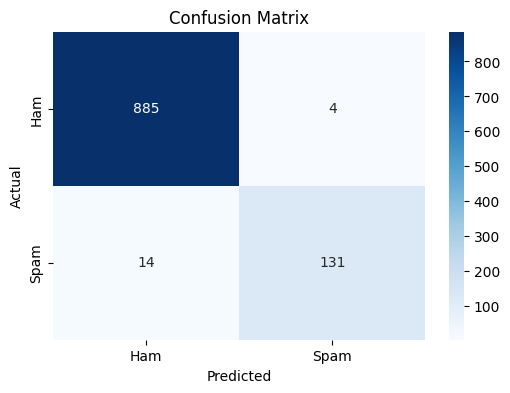

In [35]:
#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#test your messages 
def predict_message(text):
    text_vec = tfidf.transform([text])
    prediction = model.predict(text_vec)
    return prediction[0]

# Test cases
print("Message: 'Win a free iPhone' ->", predict_message("Congratulations! You've won a free iPhone. Click here."))
print("Message: 'Call mom' ->", predict_message("Hey, don't forget to call mom later."))
print("Message: 'Google authentication' ->", predict_message("Your Google verification code is 123456."))

Message: 'Win a free iPhone' -> spam
Message: 'Call mom' -> ham
Message: 'Google authentication' -> ham
